In [1]:
print("Hello Word!")

Hello Word!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('../data/vendas.csv') # Carregar o conjunto de dados
df.head() # Exibir as primeiras linhas do DataFrame

,Fecha,Productos,Ingreso,Tienda
0,01/01/2019,19,8936,1
1,02/01/2019,43,8765,1
2,03/01/2019,30,8235,1
3,04/01/2019,33,8556,1
4,05/01/2019,23,7511,1


In [ ]:
df = df.rename(columns={
    'Fecha': 'data',
    'Productos': 'produtos',
    'Ingreso': 'faturamento',
    'Tienda': 'loja'
}) # Renomear colunas para português

In [ ]:
df.shape # Verificar o número de linhas e colunas

(5480, 4)

In [ ]:
df.info() # Obter informações sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5480 entries, 0 to 5479
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   data         5480 non-null   object
 1   produtos     5480 non-null   int64 
 2   faturamento  5480 non-null   int64 
 3   loja         5480 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 171.4+ KB


In [ ]:
df.describe() # Obter estátisticas descritivas do DataFrame

,produtos,faturamento,loja
count,5480.000000,5480.000000,5480.000000
mean,32.439781,7527.536861,3.000000
std,10.260898,1448.560780,1.414343
min,15.000000,5000.000000,1.000000
25%,24.000000,6254.000000,2.000000
50%,32.000000,7566.000000,3.000000
75%,41.000000,8768.000000,4.000000
max,50.000000,10000.000000,5.000000


In [ ]:
df.isnull().sum() # Verificar valores nulos no DataFrame

data           0
produtos       0
faturamento    0
loja           0
dtype: int64

In [14]:
df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y') # Converter a coluna 'data para o tipo datetime

In [15]:
df.info() # Obter informações sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5480 entries, 0 to 5479
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   data         5480 non-null   datetime64[ns]
 1   produtos     5480 non-null   int64         
 2   faturamento  5480 non-null   int64         
 3   loja         5480 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 171.4 KB


In [19]:
df['Ano'] = df['data'].dt.year # Extrai o ano da coluna 'data' e cria uma nova coluna 'Ano'
df['Mes'] = df['data'].dt.month # Extrai o mês da coluna 'data' e cria uma nova coluna 'Mes'
df['Dia'] = df['data'].dt.day # Extrai o dia da coluna 'data'  e cria uma nova coluna 'Dia'

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5480 entries, 0 to 5479
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   data         5480 non-null   datetime64[ns]
 1   produtos     5480 non-null   int64         
 2   faturamento  5480 non-null   int64         
 3   loja         5480 non-null   int64         
 4   Ano          5480 non-null   int32         
 5   Mes          5480 non-null   int32         
 6   Dia          5480 non-null   int32         
dtypes: datetime64[ns](1), int32(3), int64(3)
memory usage: 235.6 KB


Métricas principais (KPIs)

In [ ]:
faturamento_total =df['faturamento'].sum() # Cálculo do faturamento total
produtos_vendidos = df['produtos'].sum() # Cálculo do total de produtos vendidos
ticket_medio = faturamento_total / produtos_vendidos # Cáculo do ticket_medio

faturamento_total, produtos_vendidos, ticket_medio # Exibir os KPIs

(np.int64(41250902), np.int64(177770), np.float64(232.04647578331551))

Análise por loja(Faturamento)

In [ ]:
vendas_por_loja = df.groupby('loja')['faturamento'].sum().sort_values(ascending=False) # Agrupar o faturamento por loja
vendas_por_loja # Exibir o faturamento por loja

loja
5    8283302
2    8278138
4    8264082
3    8217471
1    8207909
Name: faturamento, dtype: int64

Análise Produtos por loja

In [27]:
produtos_por_loja = df.groupby('loja')['produtos'].sum() # Agrupar o total de produtos vendidos por loja
produtos_por_loja # Exibir o total de produtos vendidos por loja

loja
1    36010
2    35684
3    35404
4    35696
5    34976
Name: produtos, dtype: int64

Evolução no tempo (muito importante)

In [30]:
# Receita por Mês
receita_mensal = (
    df.groupby(['Ano', 'Mes'])['faturamento'] # Agrupar por Ano e Mês
    .sum() # Somar o faturamento
    .reset_index() # Resetar o índece
)
receita_mensal # Exibir a receita mensal

,Ano,Mes,faturamento
0,2019,1,1189372
1,2019,2,1056570
2,2019,3,1174467
3,2019,4,1141716
4,2019,5,1144182
5,2019,6,1136124
6,2019,7,1169451
7,2019,8,1157435
8,2019,9,1101743
9,2019,10,1178623


Gráficos (a parte visual)

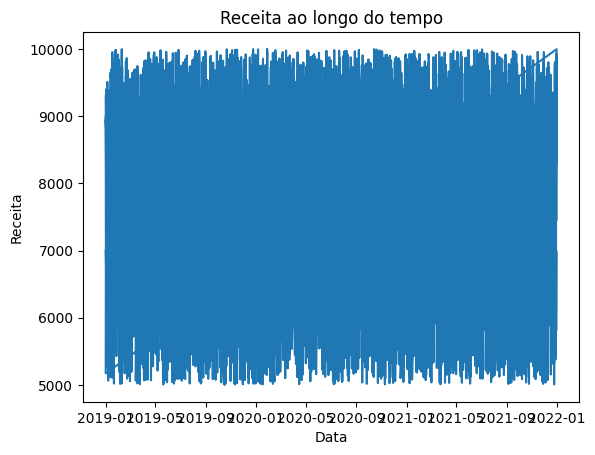

In [ ]:
# Receita ao longo do tempo

plt.figimage()
plt.plot(df['data'], df['faturamento'])
plt.title('Receita ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Receita')
plt.show()

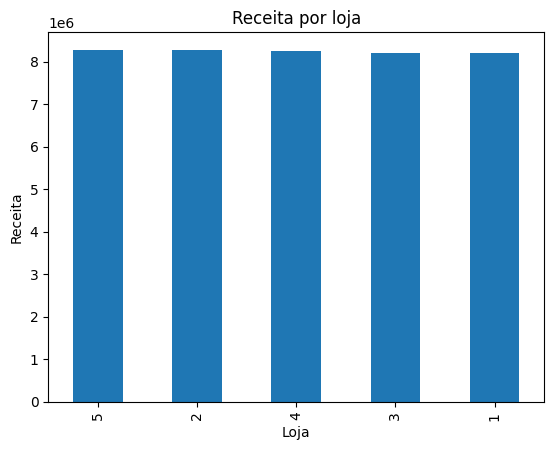

In [32]:
# Receita por loja

plt.figure()
vendas_por_loja.plot(kind='bar')
plt.title('Receita por loja')
plt.xlabel('Loja')
plt.ylabel('Receita')
plt.show()